In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading data

In [2]:
test = pd.read_csv('../2.01-lab-pandas-titanic/test.csv')
train = pd.read_csv('../2.01-lab-pandas-titanic/train.csv')

In [3]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA

In [5]:
# check for null values 
#Cabin have the most null values with 687
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

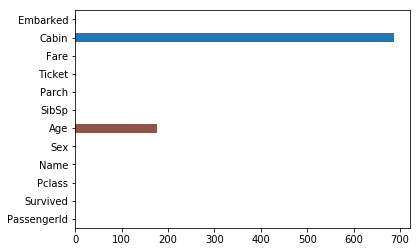

In [6]:
# barchart for missing values in each column
nullvalues = train.isnull().sum()
nullvalues.plot.barh()

In [7]:
# Examine rows in age that are null
train[train['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C


In [8]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [9]:
# drop null value row in Embarked column
train = train[-train['Embarked'].isnull()]

In [10]:
train['Embarked'].isnull().sum()

0

In [11]:
train[train['Cabin'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S


In [12]:
# Fill all empty cabins with ¯\(ツ)/¯
shruggie = '¯\(ツ)/¯'
print(shruggie)

¯\(ツ)/¯


In [13]:
# Fill empty cabins
train['Cabin'].fillna('¯\(ツ)/¯')

0          ¯\(ツ)/¯
1              C85
2          ¯\(ツ)/¯
3             C123
4          ¯\(ツ)/¯
5          ¯\(ツ)/¯
6              E46
7          ¯\(ツ)/¯
8          ¯\(ツ)/¯
9          ¯\(ツ)/¯
10              G6
11            C103
12         ¯\(ツ)/¯
13         ¯\(ツ)/¯
14         ¯\(ツ)/¯
15         ¯\(ツ)/¯
16         ¯\(ツ)/¯
17         ¯\(ツ)/¯
18         ¯\(ツ)/¯
19         ¯\(ツ)/¯
20         ¯\(ツ)/¯
21             D56
22         ¯\(ツ)/¯
23              A6
24         ¯\(ツ)/¯
25         ¯\(ツ)/¯
26         ¯\(ツ)/¯
27     C23 C25 C27
28         ¯\(ツ)/¯
29         ¯\(ツ)/¯
          ...     
861        ¯\(ツ)/¯
862            D17
863        ¯\(ツ)/¯
864        ¯\(ツ)/¯
865        ¯\(ツ)/¯
866        ¯\(ツ)/¯
867            A24
868        ¯\(ツ)/¯
869        ¯\(ツ)/¯
870        ¯\(ツ)/¯
871            D35
872    B51 B53 B55
873        ¯\(ツ)/¯
874        ¯\(ツ)/¯
875        ¯\(ツ)/¯
876        ¯\(ツ)/¯
877        ¯\(ツ)/¯
878        ¯\(ツ)/¯
879            C50
880        ¯\(ツ)/¯
881        ¯\(ツ)/¯
882        ¯

In [14]:
train['Age'].isnull().value_counts()

False    712
True     177
Name: Age, dtype: int64

In [15]:
train['Cabin'].isnull().value_counts()

True     687
False    202
Name: Cabin, dtype: int64

In [16]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Feature Extraction

In [17]:
# create new column FamilyCount totaling SibSp and Parch
train['FamilyCount'] = train['SibSp'] + train['Parch']
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [18]:
#Create new column name IsReerend. Searhc through name columns for string Rev
# using 1 if they are a preacher and 0 if not 
train['IsReverend'] = train['Name'].str.contains('Rev').astype(int)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0


In [19]:
train['IsReverend'].value_counts()

0    883
1      6
Name: IsReverend, dtype: int64

In [20]:
train_embarked_dummies = pd.get_dummies(train[['Embarked']])

train_embarked_dummies

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
5,0,1,0
6,0,0,1
7,0,0,1
8,0,0,1
9,1,0,0


In [21]:
train = pd.concat([train, train_embarked_dummies], axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,0,0,1


In [22]:
train_sex_dummies = pd.get_dummies(train[['Sex']])
train = pd.concat([train, train_sex_dummies], axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,0,0,1,0,1


## Step 4: Exploratory analysis
1. What was the survival rate overall? 38%
2. Which gender fared the worst? What was their survival rate? Male at 43.1%
3. What was the survival rate for each `Pclass`? P-Class 1 = 67%, P-Class 2 = 80%, P-Class 3 = 50%
4. Did any reverends survive? How many? 6 survived
5. What is the survival rate for cabins marked **¯\\_(ツ)_/¯**? 77.2%
6. What is the survival rate for people whose `Age` is empty? 19.7%
7. What is the survival rate for each port of embarkation? Q = 39%, S = 33.7, C = 73.8% Survived
8. What is the survival rate for children (under 12) in each `Pclass`? 
9. Did the captain of the ship survive? Is he on the list? No he did not survive and he is on the list as Capt Edward
10. Of all the people that died, who had the most expensive ticket? How much did it cost?
11. Does having family on the boat help or hurt your chances of survival? Family does help at 72.1

In [23]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,0,0,1,0,1


In [24]:
train['Survived'].value_counts()
# total 889

0    549
1    340
Name: Survived, dtype: int64

In [25]:
train['Sex'].value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [26]:
train['Pclass'].value_counts() 

3    491
1    214
2    184
Name: Pclass, dtype: int64

In [27]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived',
                                                                               ascending=False)

,Sex,Survived
0,female,0.740385
1,male,0.188908


In [28]:
train[['Pclass', 'Survived']].groupby(['Pclass'],
                                      as_index=False).mean().sort_values(by='Survived',
                                                                         ascending=False)

# P-Class 1 = 67%, P-Class 2 = 80%, P-Class 3 = 50%

,Pclass,Survived
0,1,0.626168
1,2,0.472826
2,3,0.242363


In [29]:
train[['IsReverend', 'Survived']].groupby(['IsReverend'],
                                      as_index=False).mean().sort_values(by='Survived',
                                                                         ascending=False)

,IsReverend,Survived
0,0,0.385051
1,1,0.000000


In [33]:
train[['Embarked_S', 'Survived']].groupby(['Embarked_S'],
                                      as_index=False).mean().sort_values(by='Survived',
                                                                         ascending=False)

,Embarked_S,Survived
0,0,0.502041
1,1,0.336957


In [45]:
train[['Embarked_C', 'Survived']].groupby(['Embarked_C'],
                                      as_index=False).mean().sort_values(by='Survived',
                                                                         ascending=False)

,Embarked_C,Survived
1,1,0.738462
0,0,0.635593


In [34]:
train[['Embarked_Q', 'Survived']].groupby(['Embarked_Q'],
                                      as_index=False).mean().sort_values(by='Survived',
                                                                         ascending=False)

,Embarked_Q,Survived
1,1,0.389610
0,0,0.381773


In [ ]:
# Q = 39%, S = 33.7, C = 73.8% 

In [48]:
train['Alone'].value_counts()

With Family    104
Alone           79
Name: Alone, dtype: int64

In [50]:
train[['Alone', 'Survived']].groupby(['Alone'],
                                      as_index=False).mean().sort_values(by='Survived',
                                                                         ascending=False)

,Alone,Survived
1,With Family,0.721154
0,Alone,0.607595


In [85]:
train[['Fare', 'Survived']].groupby(['Fare'],
                                      as_index=False).mean().sort_values(by='Survived',
                                                                         ascending=False).max()

Fare        512.3292
Survived      1.0000
dtype: float64

In [71]:
train[train.Name.str.contains('Cap')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Alone
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,B22,S,2,0,0,0,1,0,1,With Family


In [74]:
train[train['Age'] < 12]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Alone
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S,2,0,0,0,1,1,0,With Family
183,184,1,2,"Becker, Master. Richard F",male,1.00,2,1,230136,39.0000,F4,S,3,0,0,0,1,0,1,With Family
193,194,1,2,"Navratil, Master. Michel M",male,3.00,1,1,230080,26.0000,F2,S,2,0,0,0,1,0,1,With Family
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.00,0,1,347054,10.4625,G6,S,1,0,0,0,1,1,0,With Family
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,3,0,0,0,1,1,0,With Family
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,3,0,0,0,1,0,1,With Family
340,341,1,2,"Navratil, Master. Edmond Roger",male,2.00,1,1,230080,26.0000,F2,S,2,0,0,0,1,0,1,With Family
445,446,1,1,"Dodge, Master. Washington",male,4.00,0,2,33638,81.8583,A34,S,2,0,0,0,1,0,1,With Family
618,619,1,2,"Becker, Miss. Marion Louise",female,4.00,2,1,230136,39.0000,F4,S,3,0,0,0,1,1,0,With Family
751,752,1,3,"Moor, Master. Meier",male,6.00,0,1,392096,12.4750,E121,S,1,0,0,0,1,0,1,With Family


# Plotting 

Using Matplotlib and Seaborn, create several charts showing the survival rates of different
groups of people. It's fine if a handful of charts are basic (Gender, Age, etc),
but what we're really looking for is something beneath the surface.

In [35]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,0,0,1,0,1


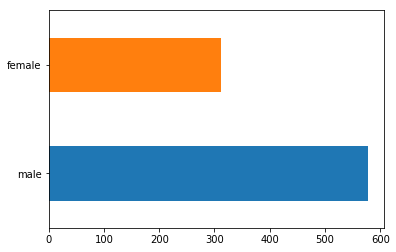

In [36]:
Sex = train['Sex'].value_counts()
Sex.plot.barh()

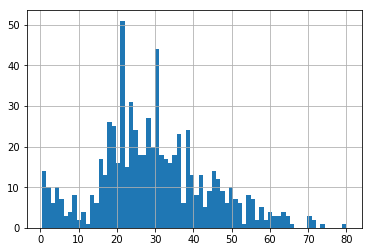

In [37]:
train['Age'].hist(bins=70)

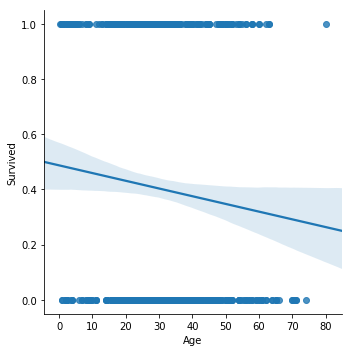

In [38]:
# the older the passanger is the less likely to survive
sns.lmplot('Age','Survived',data=train)

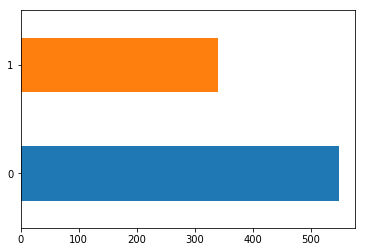

In [39]:
# overall view of who survived or not
SurvivorsD = train['Survived'].value_counts()
SurvivorsD.plot.barh()

In [40]:
# added a new column to define alone
# add the parent/child column with the sibsp column
train['Alone'] =  train.Parch + train.SibSp # I know it is the same as family count
train['Alone']

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone, Length: 889, dtype: int64

In [41]:
# Look for >0 or ==0 to set alone status
train['Alone'].loc[train['Alone'] >0] = 'With Family'
train['Alone'].loc[train['Alone'] == 0] = 'Alone'
train.head()

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,0,0,1,0,1,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0,1,0,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,0,0,1,1,0,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1,1,0,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,0,0,1,0,1,Alone


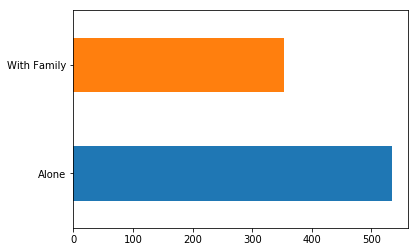

In [42]:
Alonedf = train['Alone'].value_counts()
Alonedf.plot.barh()

In [43]:
train = train.dropna()